In [1]:
import os, shutil

In [2]:
base_dir = 'data/test'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [3]:
train_longSleeve_dir = os.path.join(train_dir, 'longSleeve')
#os.mkdir(train_onepiece_dir)

train_mantoman_dir = os.path.join(train_dir, 'mantoman')
#os.mkdir(train_hood_dir)

In [4]:
test_longSleeve_dir = os.path.join(test_dir, 'longSleeve')
#os.mkdir(test_onepiece_dir)

test_mantoman_dir = os.path.join(test_dir, 'mantoman')
#os.mkdir(test_hood_dir)

In [5]:
print('훈련용 긴팔티 이미지 전체 개수:', 
      len(os.listdir(train_longSleeve_dir)))
print('훈련용 맨투맨 이미지 전체 개수:', 
      len(os.listdir(train_mantoman_dir)))
print('테스트용 긴팔티 이미지 전체 개수:', 
      len(os.listdir(test_longSleeve_dir)))
print('테스트용 맨투맨 이미지 전체 개수:', 
      len(os.listdir(test_mantoman_dir)))

훈련용 긴팔티 이미지 전체 개수: 12000
훈련용 맨투맨 이미지 전체 개수: 12000
테스트용 긴팔티 이미지 전체 개수: 3000
테스트용 맨투맨 이미지 전체 개수: 3000


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(220, 260, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 258, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 129, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 61, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 30, 128)      0

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(220, 260), # 이미지 크기 지정(모든 데이터가 크기 동일하게)
                                                   batch_size=20,
                                                   class_mode='binary')    # 두 폴더중 첫번째를 0(긴팔티), 두번째를 1(맨투맨)

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(220, 260),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 24000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator, epochs=20, validation_data = validation_generator,
                   callbacks=[early_stopping])

Epoch 1/20
1200/1200 [==============================] - 738s 614ms/step - loss: 0.5865 - accuracy: 0.6802 - val_loss: 0.5205 - val_accuracy: 0.7387
Epoch 2/20
1200/1200 [==============================] - 713s 594ms/step - loss: 0.4732 - accuracy: 0.7701 - val_loss: 0.4673 - val_accuracy: 0.7767
Epoch 3/20
1200/1200 [==============================] - 717s 597ms/step - loss: 0.4120 - accuracy: 0.8034 - val_loss: 0.4528 - val_accuracy: 0.7918
Epoch 4/20
1200/1200 [==============================] - 717s 598ms/step - loss: 0.3668 - accuracy: 0.8329 - val_loss: 0.4440 - val_accuracy: 0.7988
Epoch 5/20
1200/1200 [==============================] - 701s 585ms/step - loss: 0.3210 - accuracy: 0.8574 - val_loss: 0.4427 - val_accuracy: 0.7978
Epoch 6/20
1200/1200 [==============================] - 720s 600ms/step - loss: 0.2759 - accuracy: 0.8812 - val_loss: 0.4654 - val_accuracy: 0.8055
Epoch 7/20
1200/1200 [==============================] - 718s 599ms/step - loss: 0.2280 - accuracy: 0.9042 - val_

In [11]:
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

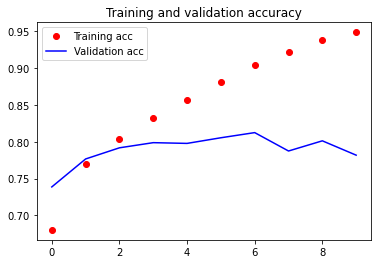

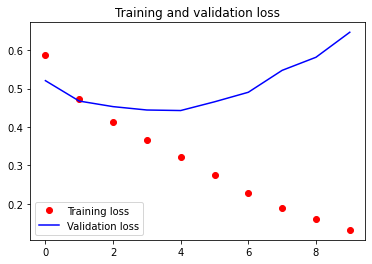

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
self_dir = os.path.join('data', 'tmp_0930')
self_rescale = ImageDataGenerator(rescale = 1./255)
self_test = self_rescale.flow_from_directory(self_dir,target_size=(220, 260),class_mode='binary')
Y_prediction = model.predict(self_test)
Y_prediction

Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 44ms/step


array([[0.00161888]], dtype=float32)